# Notebook Imports

In [1]:
import yfinance as yf
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

# Gather Data for Tesla stock
[Source : YFinance](https://pypi.org/project/yfinance/)

In [2]:
tesla = yf.Ticker('TSLA')
data = yf.download('TSLA', start="2021-01-01", end="2022-12-31")
data1 = yf.download('TSLA', start="2020-12-10", end="2023-1-10") # to be used in calculating rsi
history = tesla.history(start="2021-01-01", end="2022-12-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Data exploration

In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,262.036667,267.900537,255.369443,261.542545,261.542545,8.455088e+07
std,55.712300,57.100094,54.201024,55.775860,55.775860,3.316016e+07
min,110.349998,116.269997,108.239998,109.099998,109.099998,2.940180e+07
25%,223.900002,228.970001,217.696663,223.201668,223.201668,6.256095e+07
50%,251.136673,254.979996,244.203339,251.213333,251.213333,7.892820e+07
75%,298.750000,304.158325,290.199997,296.856659,296.856659,9.778950e+07
max,411.470001,414.496674,405.666656,409.970001,409.970001,2.681895e+08


In [4]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.995744,0.993453,0.986865,0.986865,-0.230147
High,0.995744,1.000000,0.993930,0.993920,0.993920,-0.199516
Low,0.993453,0.993930,1.000000,0.995051,0.995051,-0.271758
Close,0.986865,0.993920,0.995051,1.000000,1.000000,-0.233690
Adj Close,0.986865,0.993920,0.995051,1.000000,1.000000,-0.233690
Volume,-0.230147,-0.199516,-0.271758,-0.233690,-0.233690,1.000000


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300
2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157777300


In [7]:
tesla.info['forwardPE']

52.874744

In [8]:
print(history)

                                 Open        High         Low       Close  \
Date                                                                        
2021-01-04 00:00:00-05:00  239.820007  248.163330  239.063339  243.256668   
2021-01-05 00:00:00-05:00  241.220001  246.946671  239.733337  245.036667   
2021-01-06 00:00:00-05:00  252.830002  258.000000  249.699997  251.993332   
2021-01-07 00:00:00-05:00  259.209991  272.329987  258.399994  272.013336   
2021-01-08 00:00:00-05:00  285.333344  294.829987  279.463318  293.339996   
...                               ...         ...         ...         ...   
2022-12-23 00:00:00-05:00  126.370003  128.619995  121.019997  123.150002   
2022-12-27 00:00:00-05:00  117.500000  119.669998  108.760002  109.099998   
2022-12-28 00:00:00-05:00  110.349998  116.269997  108.239998  112.709999   
2022-12-29 00:00:00-05:00  120.389999  123.570000  117.500000  121.820000   
2022-12-30 00:00:00-05:00  119.949997  124.480003  119.750000  123.180000   

# Cleaning Data - Looking for missing values

In [9]:
data.isnull().any() #checking for null values

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2021-01-04 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       503 non-null    float64
 1   High       503 non-null    float64
 2   Low        503 non-null    float64
 3   Close      503 non-null    float64
 4   Adj Close  503 non-null    float64
 5   Volume     503 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


# Adding Technical Indicators - Relative Strength Index(RSI)

## $$RS = \frac{Average Gain}{Average Loss}$$
## $$RSI = 100 - \frac{100}{1 + RS}$$

In [11]:
#RSI tells if the stock is oversold(RSI>80) or undersold(RSI<30)

def RSI(data):
    delta = data['Close'].diff(1)
    loss = delta.copy()
    gains = delta.copy()

    gains[gains < 0] = 0
    loss[loss > 0] = 0

    avg_gain = gains.ewm(com=13, adjust=False).mean()
    avg_loss = abs(loss.ewm(com=13, adjust=False).mean())

    RS = avg_gain / avg_loss
    RSI = 100 - 100 / (1 + RS)

    return RSI

rsi_data = RSI(data1) # data1 is needed to calaculate RSI from the first date of data
print(len(data))
print(len(rsi_data)) # so that only rsi values that are required can be kept

503
523


In [12]:
data['RSI'] = rsi_data[14:518]

# Visualising using Graphs

## Plotting RSI , Price and Volume

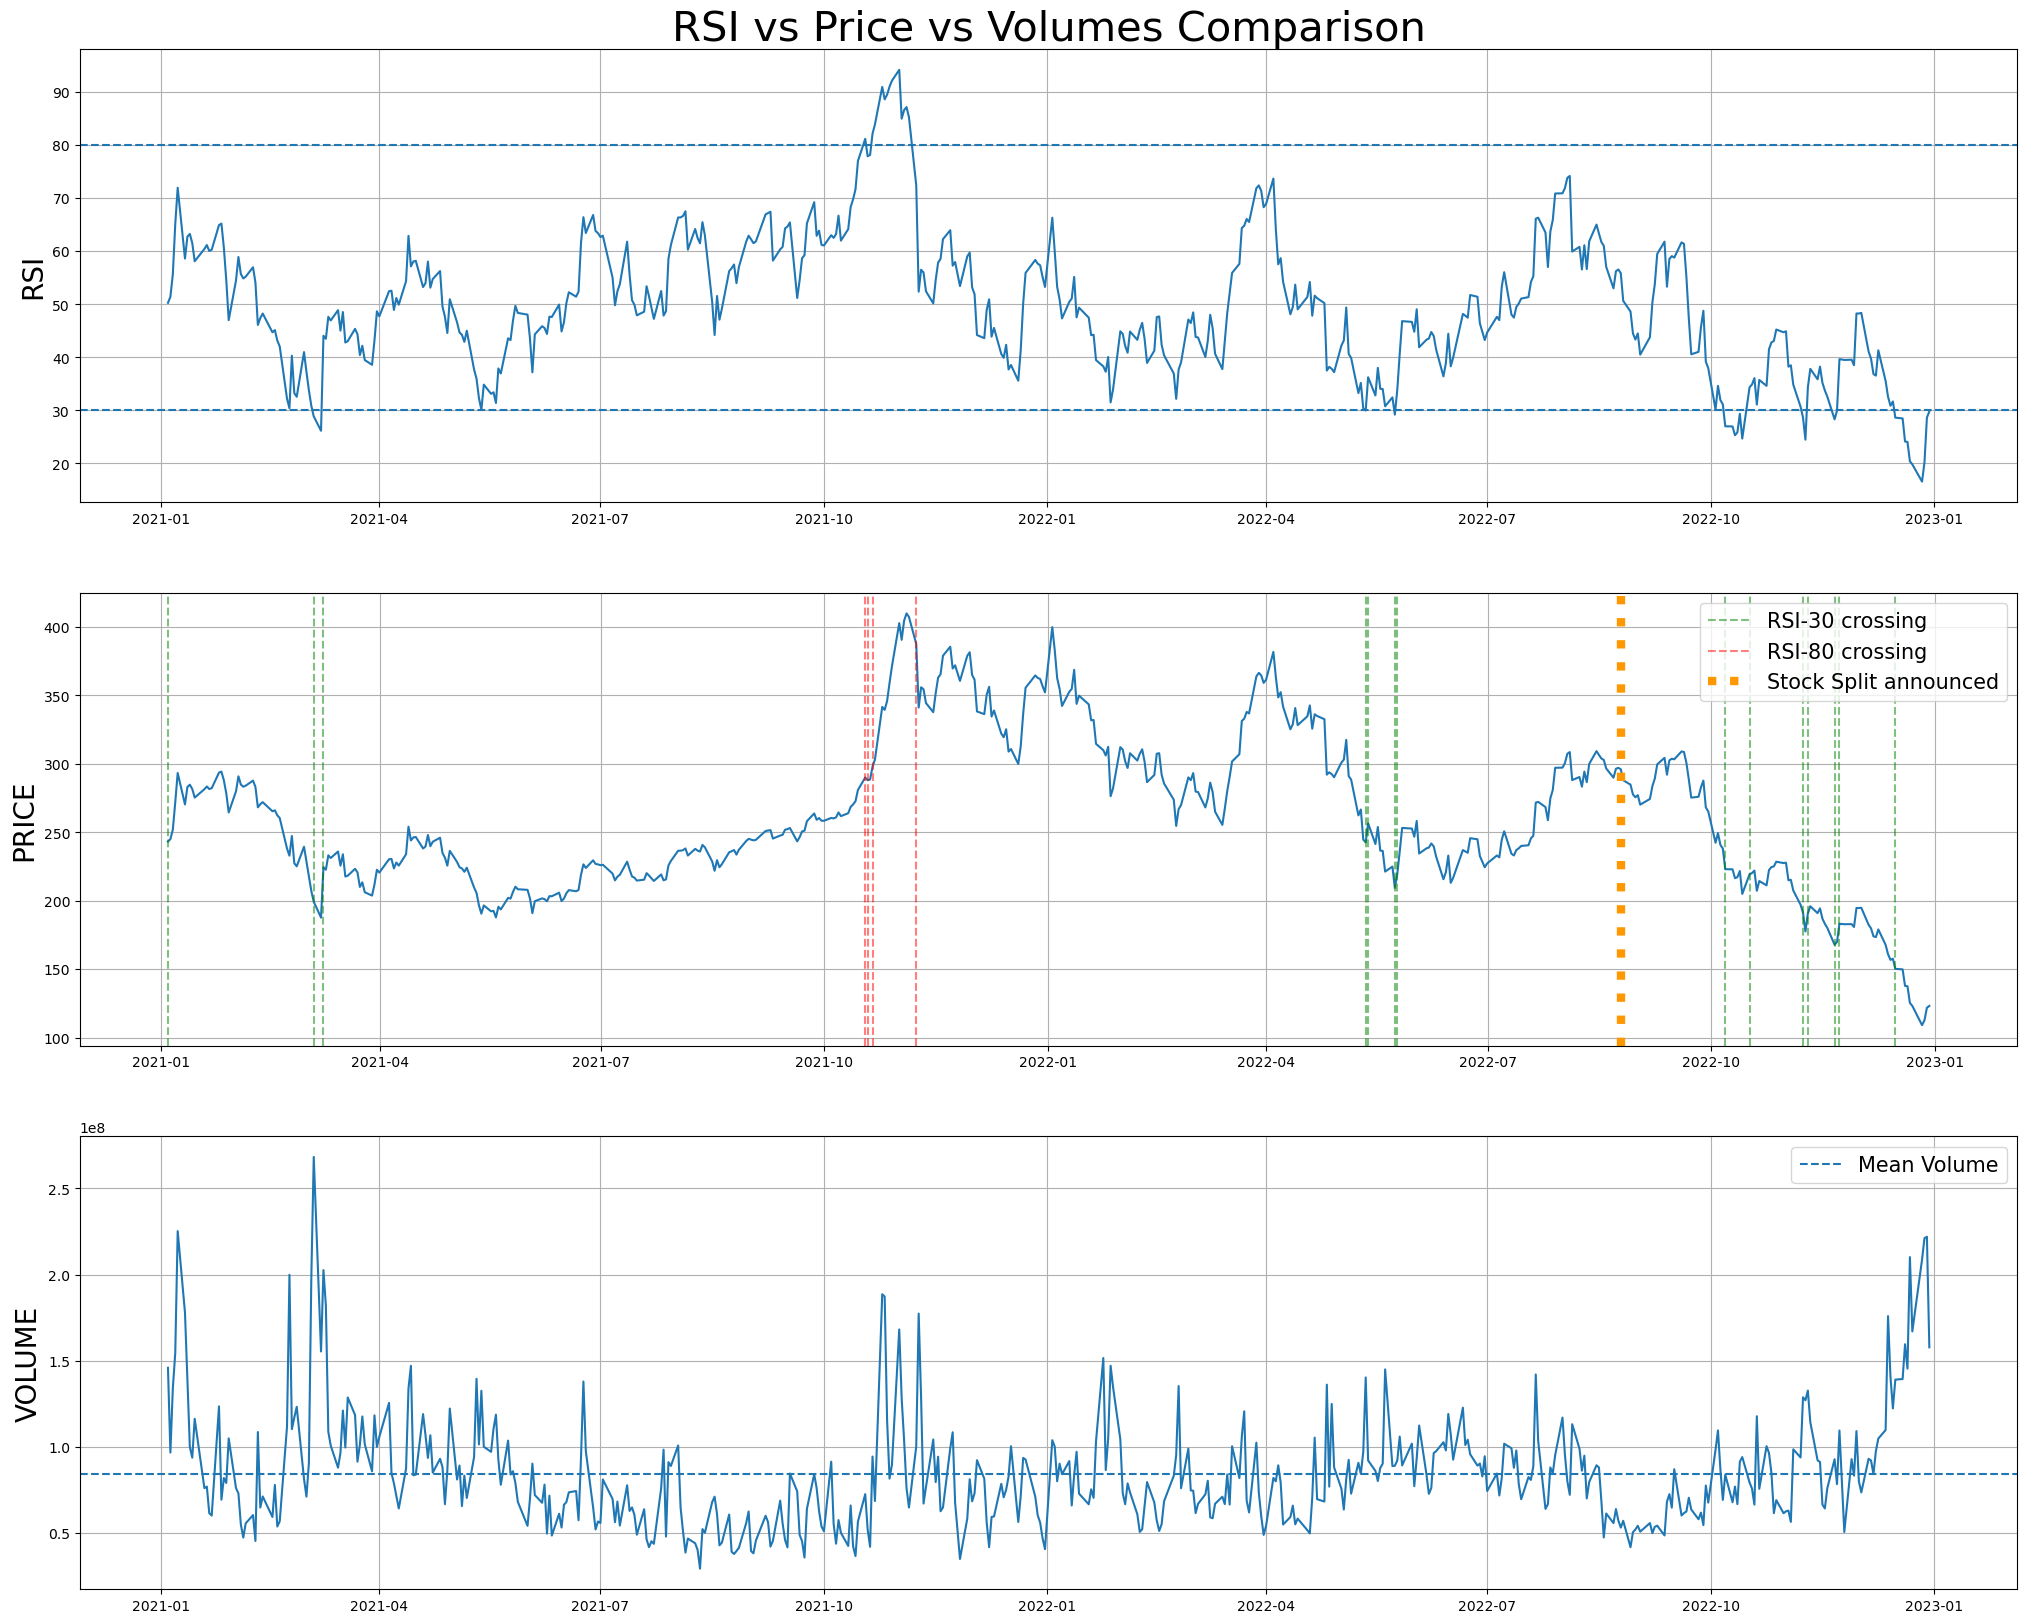

RSI seems to rebound sharply as it approaches 30

In recent times,the price doesnot seem to increase after RSI(30) crossover but it does so after RSI(80) crossover,which is opposite to the general trend

High Volumes also doesnot seem to have any effect


In [13]:
plt.figure(figsize = [25,20])

plt.subplot(3 , 1 , 1)
plt.title('RSI vs Price vs Volumes Comparison' , size = 30)
plt.plot( data['RSI'] )
plt.axhline(y = 30, linestyle = '--')
plt.axhline(y = 80, linestyle = '--')
plt.ylabel('RSI' , size = 20)
plt.grid(True)

plt.subplot(3 , 1 , 2)
plt.plot(data['Close'])
plt.ylabel('PRICE' , size = 20)
for i in range(0, len(data)):
    if (data['RSI'][i] <= 30) and (data['RSI'][i - 1] >= 30) or (data['RSI'][i] >= 30) and (data['RSI'][i - 1] <= 30) :
        l1 = plt.axvline(data.index[i], color='g', linestyle="--", alpha=0.5 )
for i in range(0, len(data)):
    if (data['RSI'][i] <= 80) and (data['RSI'][i - 1] >= 80) or (data['RSI'][i] >= 80) and (data['RSI'][i - 1] <= 80) :
        l2 = plt.axvline(data.index[i], color='red', linestyle="--", alpha=0.5 )
l3 = plt.axvline(tesla.actions['Stock Splits'].index , linestyle = ':' , lw = 6 , c = '#FF9800')
plt.legend([l1 , l2 , l3] , ['RSI-30 crossing' ,'RSI-80 crossing' , 'Stock Split announced' ] , loc = 1 ,  fontsize = 15)
plt.grid(True)

plt.subplot(3 , 1 , 3)
plt.plot( data['Volume'] )
plt.ylabel('VOLUME' , size = 20)
plt.axhline(y = data['Volume'].mean(), linestyle = '--', label = 'Mean Volume')
plt.legend(fontsize = 15)
plt.grid(True)

plt.show()

print('RSI seems to rebound sharply as it approaches 30' )
print('\nIn recent times,the price doesnot seem to increase after RSI(30) crossover but it does so after RSI(80) crossover,which is opposite to the general trend')
print('\nHigh Volumes also doesnot seem to have any effect')

## Plotting Moving Averages and Price

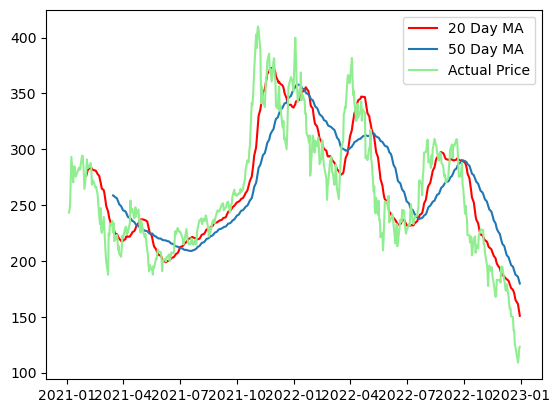


The stock consistently fails to stay above the moving averages


In [14]:
plt.plot(data['Close'].rolling(window=20).mean() , label='20 Day MA' , color = 'r')
plt.plot(data['Close'].rolling(window=50).mean() , label='50 Day MA')
plt.plot(data['Close'] , label = 'Actual Price' , color = 'lightgreen')
plt.legend()
plt.show()
print('\nThe stock consistently fails to stay above the moving averages')

# A Comparison of Tesla stock with other EV makers in 2022

## Gathering and checking data for Tesla, Rivian, GM, Ford

In [15]:
tesla = yf.download('TSLA', start="2022-01-01", end="2022-12-31")
rivian = yf.download('RIVN', start="2022-01-01", end="2022-12-31")
ford = yf.download('F', start="2022-01-01", end="2022-12-31")
gm = yf.download('GM', start="2022-01-01", end="2022-12-31")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
print(tesla.isnull().any())
print(rivian.isnull().any())
print(ford.isnull().any())
print(gm.isnull().any())

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool


In [17]:
symbols = ['TSLA' , 'RIVN' , 'GM' , 'F']
companies = ['TESLA' , 'RIVIAN' , 'GENERAL MOTORS' , 'FORD']
ev = yf.download(symbols , start="2022-01-01", end="2022-12-31" )

[*********************100%***********************]  4 of 4 completed


## Plotting Cumulative Returns over the year

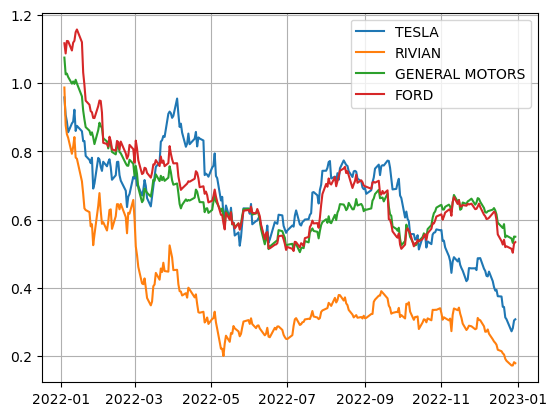


Legacy Companies like Ford And General Motors can be seen as giving better returns than Tesla


In [18]:
returns = ev['Close'].pct_change()
cumulative = (returns + 1).cumprod()
i = 0
for symbol in symbols:
    plt.plot(cumulative[symbol] , label = companies[i])
    i += 1
    
plt.legend()
plt.grid()
plt.show()
print('\nLegacy Companies like Ford And General Motors can be seen as giving better returns than Tesla')

### Checking if the companies have any correlation with each other

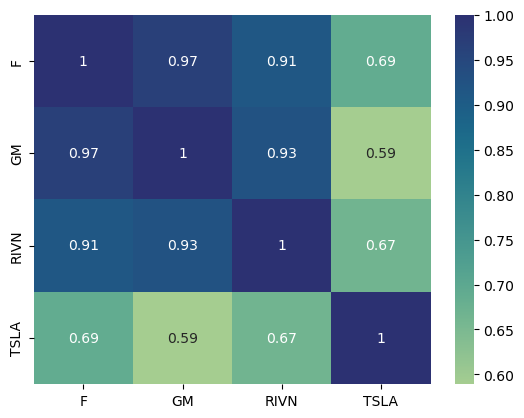


High correlation between GM and Forde prices but not so much with Tesla


In [19]:
sns.heatmap(ev['Close'].corr() , annot = True , cmap = 'crest')
plt.show()
print('\nHigh correlation between GM and Forde prices but not so much with Tesla')

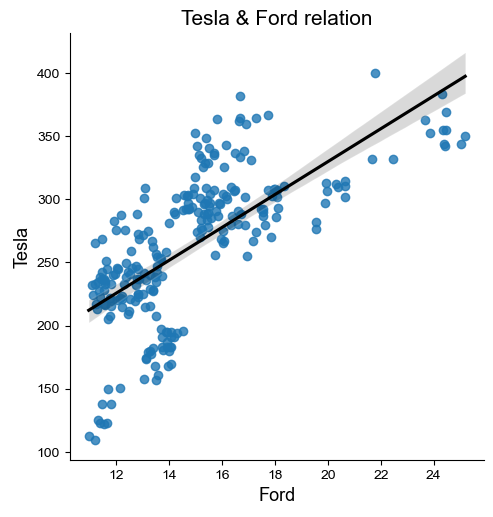

In [20]:
sns.lmplot(x = 'F' , y = 'TSLA' , data = ev['Close'] , line_kws={'color': 'black'})
plt.title('Tesla & Ford relation' , size = 15)
plt.xlabel('Ford' , size = 13)
plt.ylabel('Tesla' , size = 13)
sns.set_style('darkgrid')
plt.show()
# regr.score(ev['Close']['F'] , ev['Close']['TSLA'])

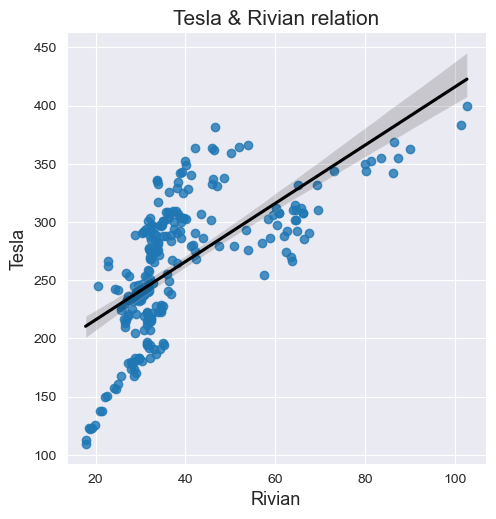

In [21]:
sns.lmplot(x = 'RIVN' , y = 'TSLA' , data = ev['Close'] , line_kws={'color': 'black'})
sns.set_style('darkgrid')
plt.title('Tesla & Rivian relation' , size = 15)
plt.xlabel('Rivian' , size = 13)
plt.ylabel('Tesla' , size = 13)
plt.show()

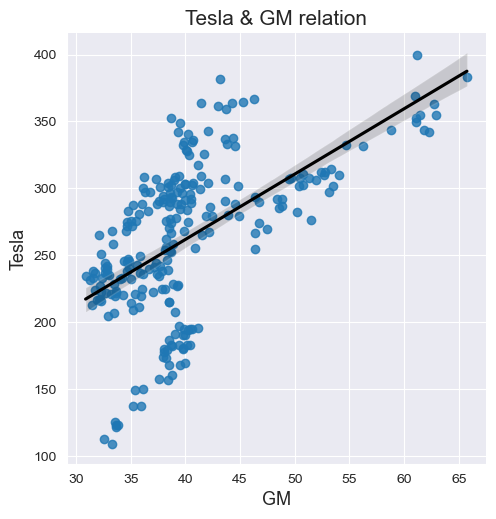

In [22]:
sns.lmplot(x = 'GM' , y = 'TSLA' , data = ev['Close'] , line_kws={'color': 'black'})
sns.set_style('darkgrid')
plt.title('Tesla & GM relation' , size = 15)
plt.xlabel('GM' , size = 13)
plt.ylabel('Tesla' , size = 13)
plt.show()

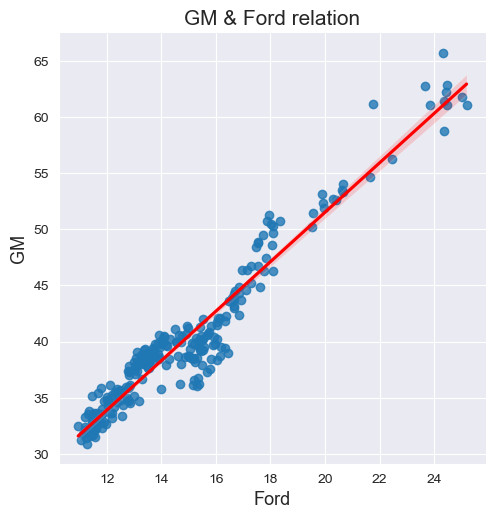

In [23]:
sns.lmplot(x = 'F' , y = 'GM' , data = ev['Close'] , line_kws={'color': 'red'})
sns.set_style('whitegrid')
plt.title('GM & Ford relation' , size = 15)
plt.xlabel('Ford' , size = 13)
plt.ylabel('GM' , size = 13)
plt.show()

## High similarity in trend in GM and Ford stocks but none with Tesla